In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("/content/EV_Dataset.csv")
df.head()

,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity
0,2014.0,jan,1/1/2014,Andhra Pradesh,ADAPTED VEHICLE,Others,Others,0.0
1,2014.0,jan,1/1/2014,Andhra Pradesh,AGRICULTURAL TRACTOR,Others,Others,0.0
2,2014.0,jan,1/1/2014,Andhra Pradesh,AMBULANCE,Others,Others,0.0
3,2014.0,jan,1/1/2014,Andhra Pradesh,ARTICULATED VEHICLE,Others,Others,0.0
4,2014.0,jan,1/1/2014,Andhra Pradesh,BUS,Bus,Bus,0.0


Top 10 states

In [7]:
df['EV_Sales_Quantity'] = pd.to_numeric(df['EV_Sales_Quantity'], errors='coerce')
df = df.dropna(subset=['State', 'EV_Sales_Quantity'])

In [8]:
statewise_sales = df.groupby('State')['EV_Sales_Quantity'].sum().reset_index()

In [9]:
statewise_sales = statewise_sales.sort_values(by='EV_Sales_Quantity', ascending=False)

In [10]:
print(statewise_sales.head(10))

            State  EV_Sales_Quantity
31  Uttar Pradesh           732074.0
19    Maharashtra           401535.0
15      Karnataka           315498.0
8           Delhi           268538.0
27      Rajasthan           228573.0
4           Bihar           213465.0
29     Tamil Nadu           206902.0
10        Gujarat           176713.0
3           Assam           151917.0
16         Kerala           133246.0


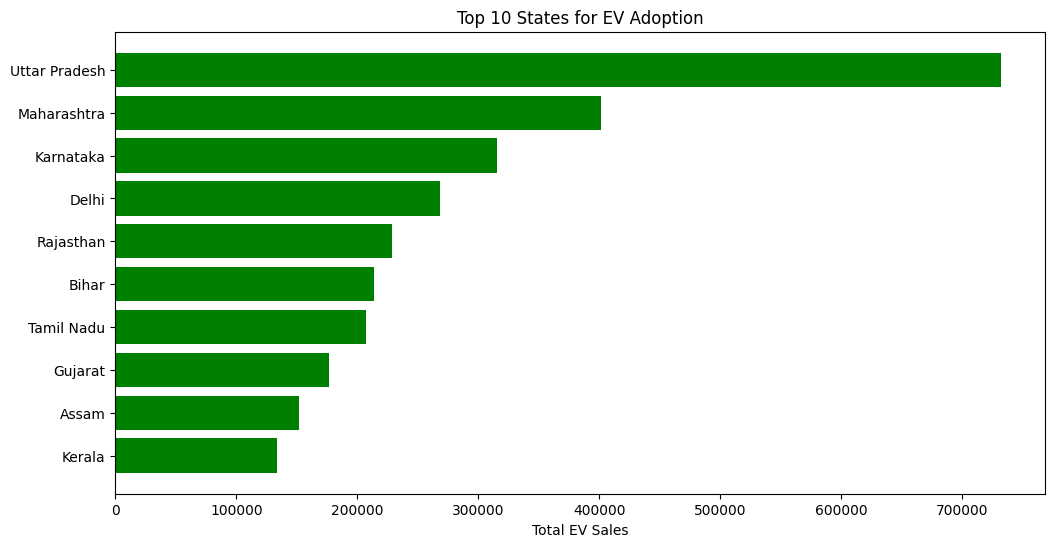

In [11]:
import matplotlib.pyplot as plt

top_states = statewise_sales.head(10)
plt.figure(figsize=(12, 6))
plt.barh(top_states['State'], top_states['EV_Sales_Quantity'], color='green')
plt.xlabel("Total EV Sales")
plt.title("Top 10 States for EV Adoption")
plt.gca().invert_yaxis()
plt.show()


Region based classification


In [17]:
state_region_map = {
    # North India
    'Jammu and Kashmir': 'North',
    'Himachal Pradesh': 'North',
    'Punjab': 'North',
    'Haryana': 'North',
    'Delhi': 'North',
    'Uttarakhand': 'North',
    'Uttar Pradesh': 'North',

    # South India
    'Andhra Pradesh': 'South',
    'Telangana': 'South',
    'Tamil Nadu': 'South',
    'Karnataka': 'South',
    'Kerala': 'South',

    # East India
    'West Bengal': 'East',
    'Odisha': 'East',
    'Bihar': 'East',
    'Jharkhand': 'East',

    # North-East India
    'Assam': 'North-East',
    'Sikkim': 'North-East',
    'Meghalaya': 'North-East',
    'Manipur': 'North-East',
    'Tripura': 'North-East',
    'Nagaland': 'North-East',
    'Arunachal Pradesh': 'North-East',
    'Mizoram': 'North-East',

    # West India
    'Rajasthan': 'West',
    'Gujarat': 'West',
    'Maharashtra': 'West',
    'Goa': 'West',

    # Central India
    'Madhya Pradesh': 'Central',
    'Chhattisgarh': 'Central'
}


Top regions for product launch

In [18]:
df['Region'] = df['State'].map(state_region_map)

In [19]:
df['Year'] = df['Year'].astype(int)

region_trend = df.groupby(['Region', 'Year'])['EV_Sales_Quantity'].sum().reset_index()


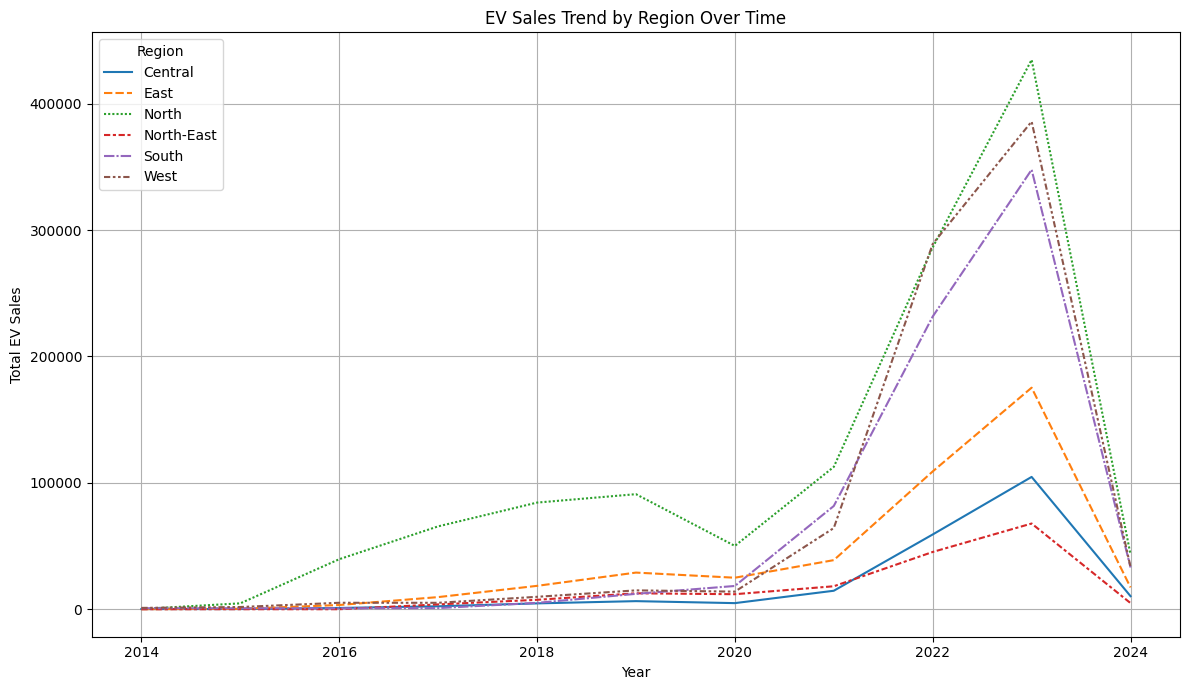

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

pivot = region_trend.pivot(index='Year', columns='Region', values='EV_Sales_Quantity')

plt.figure(figsize=(12, 7))
sns.lineplot(data=pivot)
plt.title("EV Sales Trend by Region Over Time")
plt.ylabel("Total EV Sales")
plt.xlabel("Year")
plt.grid(True)
plt.legend(title='Region')
plt.tight_layout()
plt.show()


Region wise top states

In [21]:
region_state_sales = df.groupby(['Region', 'State'])['EV_Sales_Quantity'].sum().reset_index()


In [22]:
top_states = region_state_sales.loc[region_state_sales.groupby('Region')['EV_Sales_Quantity'].idxmax()].reset_index(drop=True)

print(top_states)


       Region           State  EV_Sales_Quantity
0     Central  Madhya Pradesh           133182.0
1        East           Bihar           213465.0
2       North   Uttar Pradesh           732074.0
3  North-East           Assam           151917.0
4       South       Karnataka           315498.0
5        West     Maharashtra           401535.0


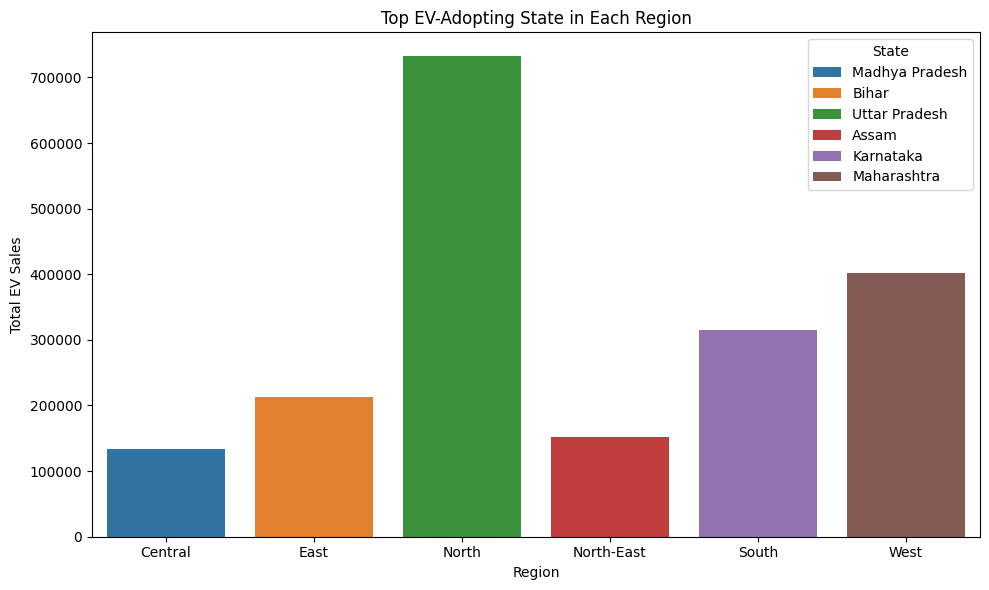

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(data=top_states, x='Region', y='EV_Sales_Quantity', hue='State')
plt.title("Top EV-Adopting State in Each Region")
plt.ylabel("Total EV Sales")
plt.xlabel("Region")
plt.legend(title='State')
plt.tight_layout()
plt.show()


Analysis on EV class

In [24]:
vehicle_class_sales = df.groupby(['State', 'Vehicle_Class'])['EV_Sales_Quantity'].sum().reset_index()


In [25]:
pivot = vehicle_class_sales.pivot(index='State', columns='Vehicle_Class', values='EV_Sales_Quantity').fillna(0)


In [26]:
top_vehicle_by_state = pivot.idxmax(axis=1)


In [28]:
top_vehicle_summary = pd.DataFrame({
    'Top_Vehicle_Class': pivot.idxmax(axis=1),
    'Max_Sales': pivot.max(axis=1)
}).reset_index()

print(top_vehicle_summary.head)


<bound method NDFrame.head of                        State Top_Vehicle_Class  Max_Sales
0   Andaman & Nicobar Island         MOTOR CAR       92.0
1             Andhra Pradesh   M-CYCLE/SCOOTER    64662.0
2          Arunachal Pradesh         MOTOR CAR       28.0
3                      Assam     E-RICKSHAW(P)   137982.0
4                      Bihar     E-RICKSHAW(P)   174880.0
5                 Chandigarh     E-RICKSHAW(P)     4684.0
6               Chhattisgarh   M-CYCLE/SCOOTER    43889.0
7                 DNH and DD   M-CYCLE/SCOOTER      128.0
8                      Delhi     E-RICKSHAW(P)   134439.0
9                        Goa   M-CYCLE/SCOOTER    15054.0
10                   Gujarat   M-CYCLE/SCOOTER   141152.0
11                   Haryana     E-RICKSHAW(P)    43732.0
12          Himachal Pradesh   M-CYCLE/SCOOTER     2172.0
13         Jammu and Kashmir     E-RICKSHAW(P)     7812.0
14                 Jharkhand     E-RICKSHAW(P)    26189.0
15                 Karnataka   M-CYCLE/SCO

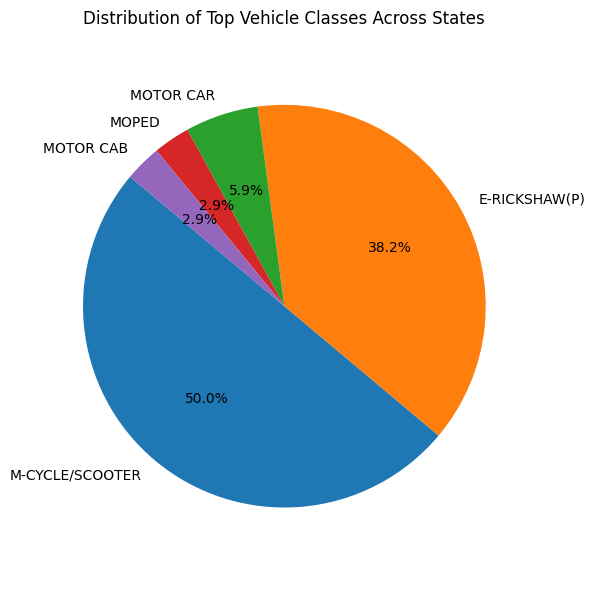

In [29]:
# Count of each top vehicle class across all states
vehicle_class_counts = top_vehicle_summary['Top_Vehicle_Class'].value_counts()

# Pie chart
plt.figure(figsize=(6, 6))
plt.pie(vehicle_class_counts, labels=vehicle_class_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Top Vehicle Classes Across States')
plt.axis('equal')
plt.tight_layout()
plt.show()


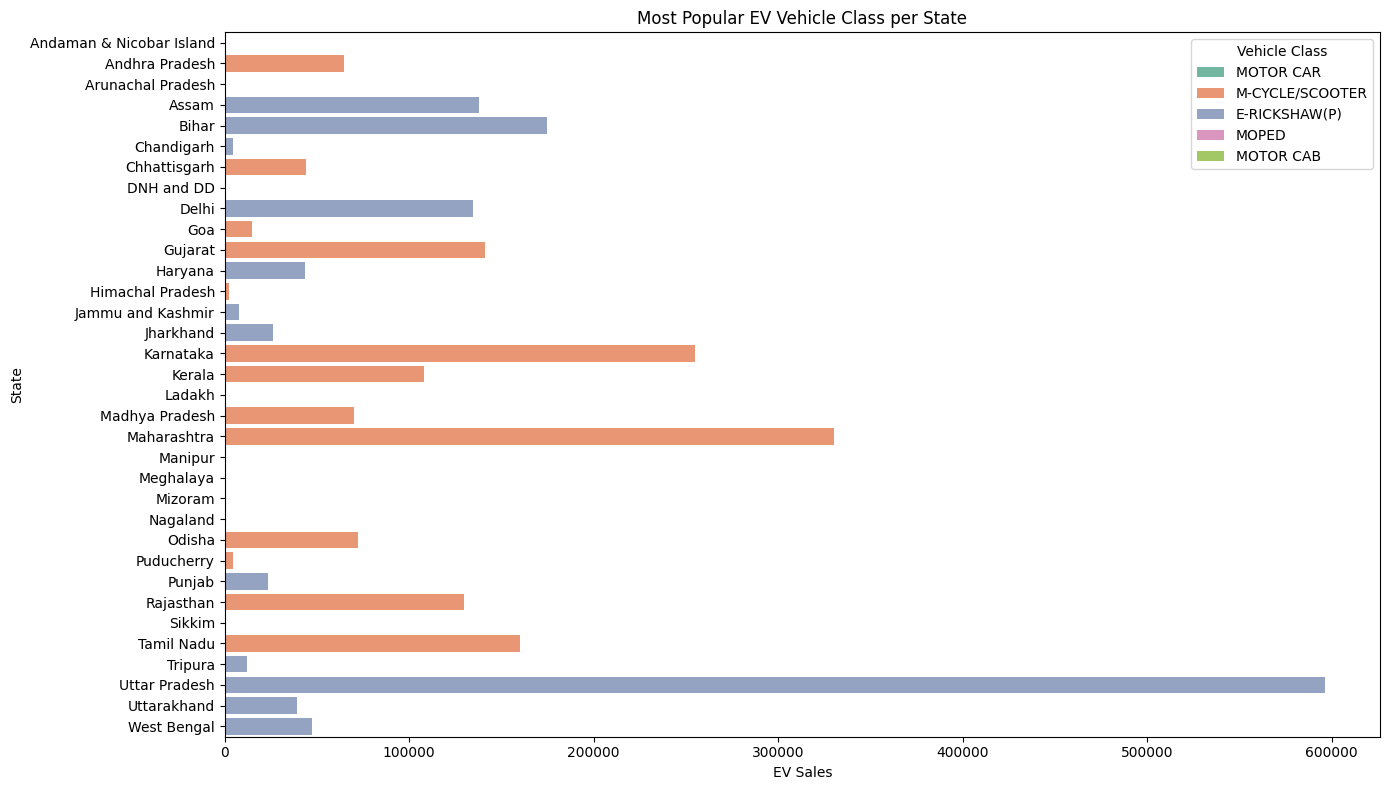

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))
sns.barplot(
    data=top_vehicle_summary,
    x='Max_Sales',
    y='State',
    hue='Top_Vehicle_Class',
    dodge=False,
    palette='Set2'
)

plt.title('Most Popular EV Vehicle Class per State')
plt.xlabel('EV Sales')
plt.ylabel('State')
plt.legend(title='Vehicle Class')
plt.tight_layout()
plt.show()


Month wise trend analysis

In [40]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month_Name'] = df['Date'].dt.strftime('%B')
df['Month_Num'] = df['Date'].dt.month


In [41]:
monthly_state_sales = df.groupby(['State', 'Month_Num', 'Month_Name'])['EV_Sales_Quantity'].sum().reset_index()
monthly_state_sales = monthly_state_sales.sort_values(['State', 'Month_Num'])


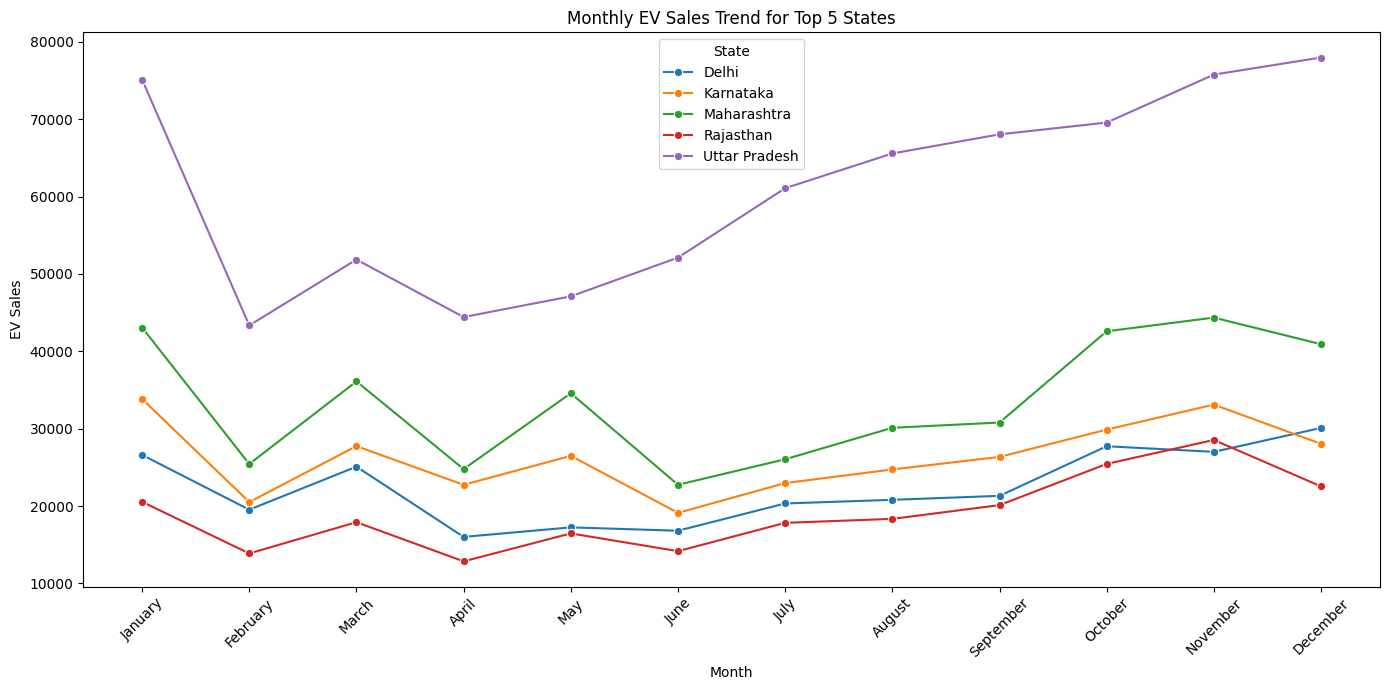

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

top_states = df.groupby('State')['EV_Sales_Quantity'].sum().nlargest(5).index
filtered_data = monthly_state_sales[monthly_state_sales['State'].isin(top_states)]

plt.figure(figsize=(14, 7))
sns.lineplot(data=filtered_data, x='Month_Name', y='EV_Sales_Quantity', hue='State', marker='o')
plt.title('Monthly EV Sales Trend for Top 5 States')
plt.xlabel('Month')
plt.ylabel('EV Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Comparison on 2 wheeler and 3 wheeler EV

In [43]:
df2 = pd.read_csv("/content/ev on 2w and 3w.csv")
df2.head()

,Sl. No.,State/UT,e-2W,e-3W,Total
0,1,Andaman and Nicobar Islands,17,NaN,17
1,2,Andhra Pradesh,39331,2640.0,41971
2,3,Arunachal Pradesh,18,NaN,18
3,4,Assam,2464,12111.0,14575
4,5,Bihar,13672,10136.0,23808


In [44]:
top_total = df2.sort_values('Total', ascending=False)

top_2w = df2.sort_values('e-2W', ascending=False)
top_3w = df2.sort_values('e-3W', ascending=False)


In [46]:
df2['%_e2W'] = (df2['e-2W'] / df2['Total']) * 100
df2['%_e3W'] = (df2['e-3W'] / df2['Total']) * 100


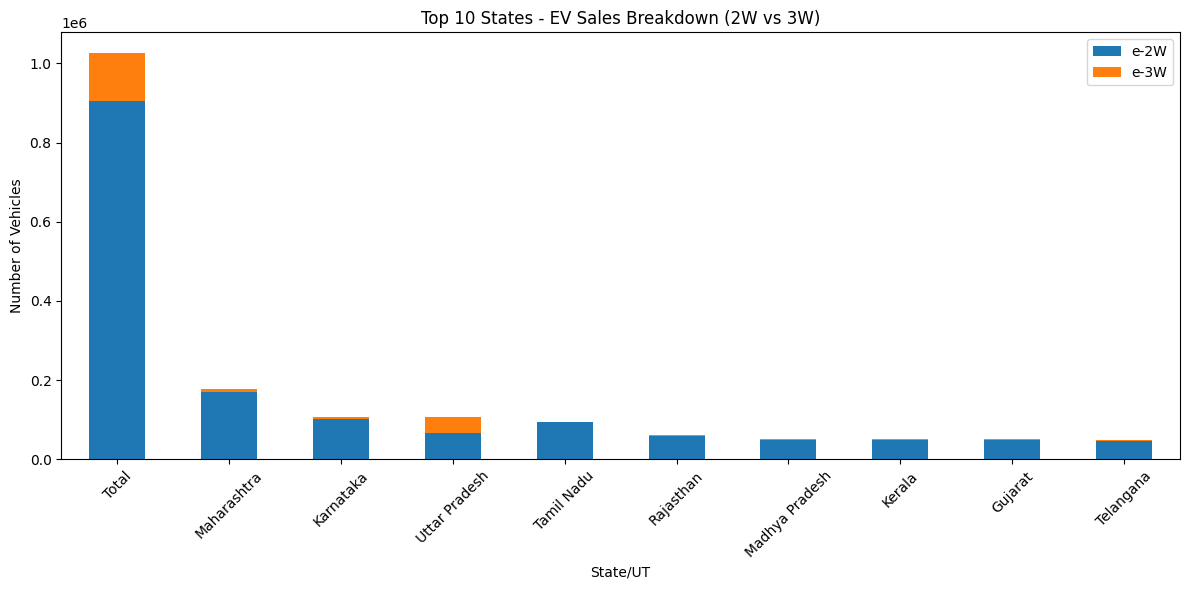

In [47]:
import matplotlib.pyplot as plt

df_sorted = df2.sort_values('Total', ascending=False).head(10)  # Top 10 states
df_sorted[['State/UT', 'e-2W', 'e-3W']].set_index('State/UT').plot(kind='bar', stacked=True, figsize=(12,6))
plt.title('Top 10 States - EV Sales Breakdown (2W vs 3W)')
plt.ylabel('Number of Vehicles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Analysis based on charging stations

In [48]:
df3 = pd.read_csv("/content/charging_stations.csv")
df3.head()

,State/UT,No. of EV Chargers Sanctioned
0,Maharashtra,317
1,Andhra Pradesh,266
2,Tamil Nadu,281
3,Gujarat,278
4,Uttar Pradesh,207


<ipython-input-50-e2525000fff3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='No. of EV Chargers Sanctioned', y='State/UT', data=df3, palette='crest')


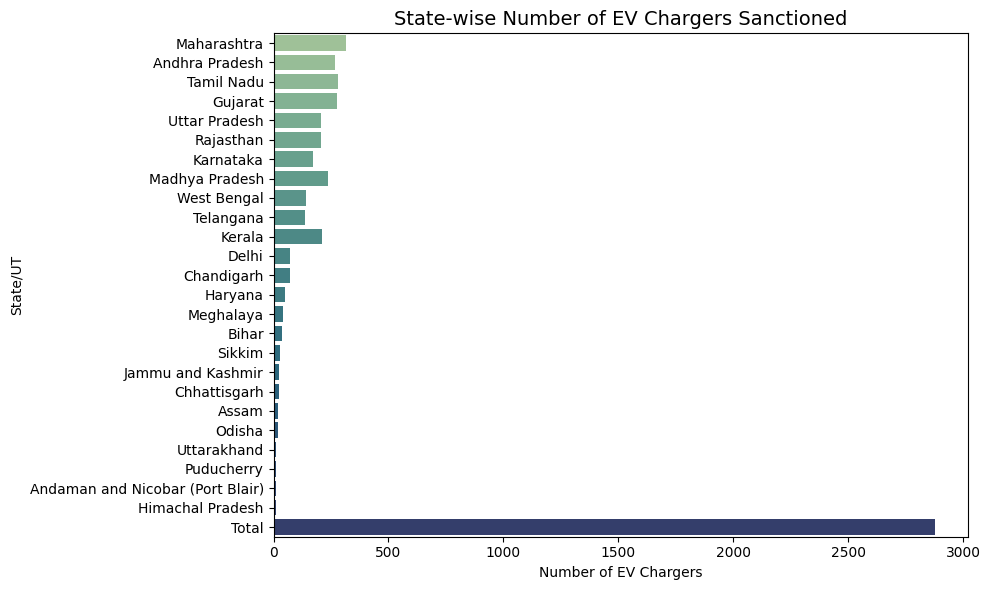

In [50]:
plt.figure(figsize=(10, 6))
sns.barplot(x='No. of EV Chargers Sanctioned', y='State/UT', data=df3, palette='crest')
plt.title('State-wise Number of EV Chargers Sanctioned', fontsize=14)
plt.xlabel('Number of EV Chargers')
plt.ylabel('State/UT')
plt.tight_layout()
plt.show()